<a href="https://colab.research.google.com/github/Franco-gmz/AnalisisNumerico/blob/main/F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import *

#Ejercicio F1

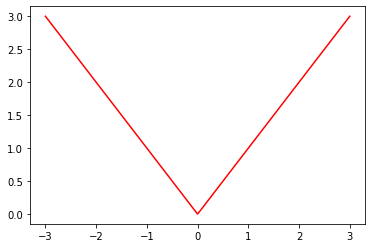

In [43]:
x = np.linspace(-3,3,1000)
plt.plot(x,np.abs(x),'r')
plt.show()

In [44]:
x, n = symbols('x n')

def coeficiente_an():
  an = integrate( Abs(x)*(cos((2*pi*n*x)/6)),(x, -3, 3) )
  return an

def coeficiente_bn():
  bn = integrate( Abs(x)*(sin((2*pi*n*x)/6)),(x, -3, 3) )
  return bn

In [45]:
an = coeficiente_an()

In [46]:
bn = coeficiente_bn()
print(bn.evalf()) #correcto porque es una funcion par

0


In [47]:
def ECM(orden):
  t1 = (1/6)*integrate(Abs(x)**2,(x,-3,3)) #trivial, pero para ver que funciona
  if (orden == 0): return t1
  t2 = ((an.evalf(subs={n:0}))**2)/4 #(a0^2)/4
  t3 = 0
  for i in range(1,orden+1): #sumario de los coeficientes al cuadrado hasta llegar al orden especificado 
    t3 += ( (an.evalf(subs={n:i})**2) + (bn.evalf(subs={n:i})**2) ) #an^2 + bn^2
  t3 = (1/2)*t3

  resultado = t1 -t2 -t3
  return np.abs(resultado)

In [48]:
ecm_ = []
k = range(1,51)

for i in k:
  ecm_ += [ECM(i)] #guardo los ECM para k = 1, ... , 20

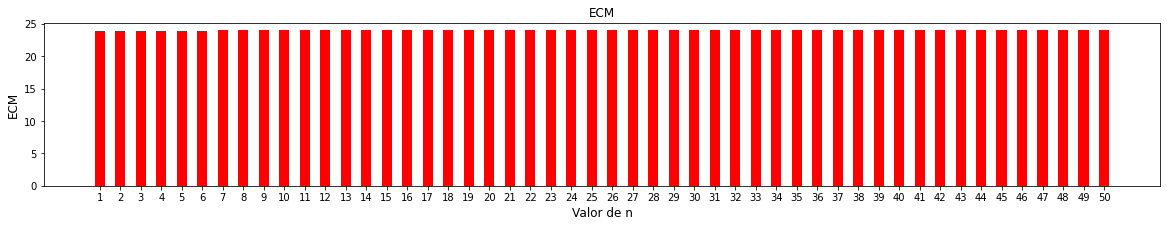

In [49]:
fig,ax = plt.subplots(figsize=(20,3))
ax.bar(x=k,height=ecm_,width=.5,color='r')
ax.set_xticks(k)
ax.set_xticklabels(list(map(lambda x: str(x),k)))
ax.set_title("ECM")
ax.set_ylabel('ECM',fontdict=dict(fontsize=12))
ax.set_xlabel('Valor de n',fontdict=dict(fontsize=12))
plt.show()

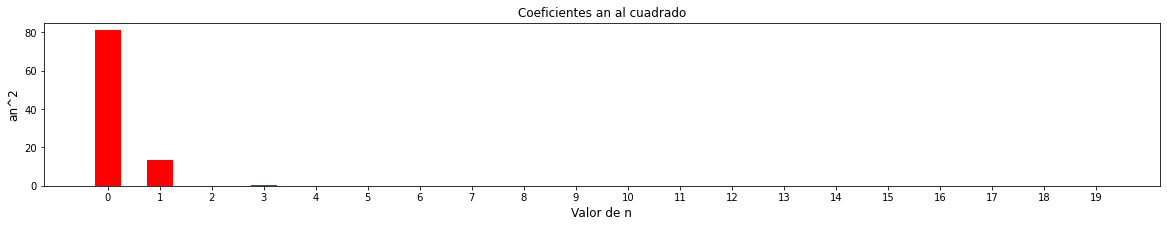

In [50]:
an_2 = []
idx = range(0,20)
for i in idx:
  an_2 += [(an.evalf(subs={n:i}))**2] #guardo los an^2

fig,ax = plt.subplots(figsize=(20,3))
ax.bar(x=idx,height=an_2,width=.5,color='r')
ax.set_xticks(idx)
ax.set_xticklabels(list(map(lambda x: str(x),idx)))
ax.set_title("Coeficientes an al cuadrado")
ax.set_ylabel('an^2',fontdict=dict(fontsize=12))
ax.set_xlabel('Valor de n',fontdict=dict(fontsize=12))
plt.show()

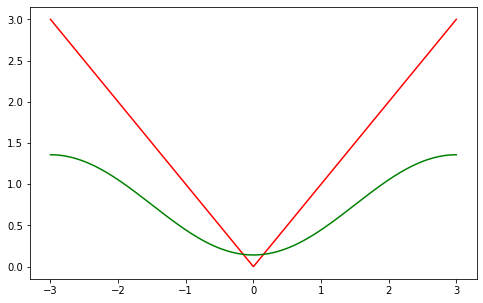

In [51]:
a0 = an.evalf(subs={n:0})/12
a1 = an.evalf(subs={n:1})/6
#bn = 0 para todo n

f = lambda x: a0+a1*np.cos( (2*np.pi*x)/6 )

x = np.linspace(-3,3,1000)
y = f(x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,np.abs(x),'r')
ax.plot(x,y,'g')
plt.show()

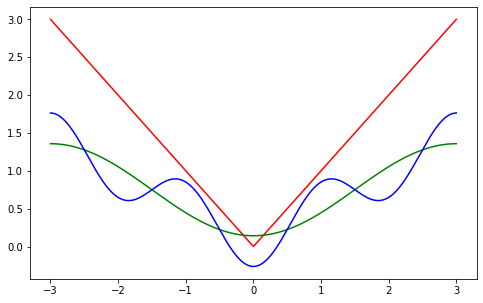

In [54]:
#agrego a3
a3 = an.evalf(subs={n:3})
g = lambda x: a0+a1*np.cos( (2*np.pi*x)/6 )+a3*np.cos( (2*np.pi*3*x)/6 )

z = g(x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,np.abs(x),'r')
ax.plot(x,y,'g')
ax.plot(x,z,'b')

plt.show()